# Looking at the new dataset
This is based on Greg Landrum's blog post which can be found here:
https://rdkit.blogspot.com/2019/10/a-new-lessel-and-briem-like-dataset.html

In [1]:
import os
import time
from collections import defaultdict

import numpy as np
import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem.MolStandardize import rdMolStandardize  # type: ignore

print(rdkit.__version__)
print(time.asctime())

2023.09.4
Fri Apr  5 19:42:41 2024


Metadata about the new dataset is in a separate file:

In [2]:
import pandas as pd

url_base = "https://raw.githubusercontent.com/greglandrum/rdkit_blog/master/data/"
bl_actives_key_fname = "BLSets_actives_target_key.txt"
bl_actives_fname = "BLSets_actives.txt"
decoy_fname = "BLSets_singleic50_decoys.txt"

for file in [bl_actives_key_fname, bl_actives_fname, decoy_fname]:
    url = url_base + file
    if not os.path.exists(file):
        os.system(f"wget {url}")


key_df = pd.read_csv(bl_actives_key_fname, sep="\t")
print(len(key_df))
key_df.head()

35


,tid,chembl_id,pref_name,organism
0,8,CHEMBL1862,Tyrosine-protein kinase ABL,Homo sapiens
1,11,CHEMBL204,Thrombin,Homo sapiens
2,15,CHEMBL205,Carbonic anhydrase II,Homo sapiens
3,10260,CHEMBL4794,Vanilloid receptor,Homo sapiens
4,10280,CHEMBL264,Histamine H3 receptor,Homo sapiens


Here's the data itself:

In [3]:
actives_df = pd.read_csv(bl_actives_fname, sep="\t")
actives_df.head()

,smiles,target_chembl_id,label,pKi
0,Clc1ccc(cc1Cl)N2NC(=O)\C(=C\c3cccc(OCc4ccccc4)...,CHEMBL1862,inactive,6.00
1,Cc1ccc(cc1C)N2NC(=O)\C(=C\c3oc(cc3)c4ccc(C)c(C...,CHEMBL1862,inactive,5.30
2,O=C(Nc1ccccc1)Nc2nnc(Cc3ccccc3)s2,CHEMBL1862,inactive,4.24
3,Brc1cc2OCOc2cc1\C=C/3\C(=O)NN(C3=O)c4ccc(I)cc4,CHEMBL1862,inactive,5.60
4,Nc1[nH]cnc2nnc(c3ccc(Cl)cc3)c12,CHEMBL1862,inactive,6.30


Let's count the number of actives and inactives for each target:

In [4]:
nActs = []
nInacts = []
for tid in key_df.chembl_id:
    d = actives_df[actives_df.target_chembl_id == tid]
    nActs.append(len(d[d.label == "active"]))
    nInacts.append(len(d[d.label == "inactive"]))
key_df["nActives"] = nActs
key_df["nInactives"] = nInacts
min(nActs), max(nActs), min(nInacts), max(nInacts)

(205, 934, 54, 3502)

In [5]:
decoys_df = pd.read_csv(decoy_fname, sep="\t")
decoys_df.head()

,molregno,chembl_id,smiles
0,1981,CHEMBL7027,O=C(Oc1ccc2[nH]c(cc2c1)C(=O)c3cc4ccccc4[nH]3)C...
1,2464,CHEMBL7552,OC(=O)[C@H](Cc1ccc(cc1)C#N)NC(=O)c2ccccc2Br
2,2515,CHEMBL7605,C[C@@H](NC(=O)c1ccccc1Br)C(=O)O
3,4855,CHEMBL9164,CCCCCCC(=O)O[C@H](CC=C(C)C)C1=CC(=O)c2c(O)ccc(...
4,5616,CHEMBL9455,COc1ccc(CCCN2CCC(COC(c3ccc(Cl)cc3)c4ccc(Cl)cc4...


Now lets read in all the molecules, do salt stripping, and split them into three sets: actives, measured inactives, and decoys:

In [6]:
salt_remover = rdMolStandardize.FragmentRemover()

In [8]:
actives = defaultdict(list)
just_actives = actives_df[actives_df.label == "active"]
for smi, tgt in zip(just_actives.smiles, just_actives.target_chembl_id):
    m = salt_remover.remove(Chem.MolFromSmiles(smi))  # type: ignore
    Chem.SanitizeMol(m)  # type: ignore
    actives[tgt].append(m)
inactives = defaultdict(list)
just_inactives = actives_df[actives_df.label == "inactive"]
for smi, tgt in zip(just_inactives.smiles, just_inactives.target_chembl_id):
    m = salt_remover.remove(Chem.MolFromSmiles(smi))  # type: ignore
    Chem.SanitizeMol(m)  # type: ignore
    inactives[tgt].append(m)
decoys = []
for smi in decoys_df.smiles:
    m = salt_remover.remove(Chem.MolFromSmiles(smi))  # type: ignore
    Chem.SanitizeMol(m)  # type: ignore
    decoys.append(m)

[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running FragmentRemover
[19:43:14] Running F

Generate the MFP2 fingerprints using the fingerprint generator code:

In [9]:
from rdkit.Chem import rdFingerprintGenerator  # type: ignore

mfp2_gen = rdFingerprintGenerator.GetMorganGenerator(2)
mfp2_fps = []
for cls in actives:
    for m in actives[cls]:
        mfp2_fps.append((cls, mfp2_gen.GetFingerprint(m)))
mfp2_inactive_fps = []
for cls in inactives:
    for m in inactives[cls]:
        mfp2_inactive_fps.append((cls, mfp2_gen.GetFingerprint(m)))
mfp2_decoys_fps = []
for m in decoys:
    mfp2_decoys_fps.append(mfp2_gen.GetFingerprint(m))

This is the code we'll use to run the actual similarity experiments.

There's ample room to make this code more readable and efficient, but for the purposes of the 

In [10]:
import random
from collections import defaultdict


def run_experiment(mols, fps, decoy_fps, decoy_frac=1.0):
    random.seed(len(fps))
    stats = defaultdict(list)
    for cls in list(mols.keys()):
        lfps = []
        for i, (cl, fp) in enumerate(fps):
            if cl != cls:
                continue
            lfps.append(fp)
        if type(decoy_fps[0]) == tuple:
            decoys = [x[1] for x in decoy_fps if x[0] == cls]
        else:
            decoys = decoy_fps[:]
        random.seed(len(lfps))
        random.shuffle(decoys)
        if len(decoys) < int(decoy_frac) * len(lfps):
            print(f'skipping dataset "{cls}" for insufficient decoys')
            continue
        decoys = decoys[: int(decoy_frac * len(lfps))]
        just_classes = [cls] * len(lfps) + ["decoy"] * len(decoys)
        for i, fp in enumerate(lfps):
            sims = list(zip(DataStructs.BulkTanimotoSimilarity(fp, lfps + decoys), just_classes))  # type: ignore
            # remove the self term
            # sims.pop(i)
            sims = sorted(sims, reverse=True)
            stats[cls].append(sims)
    thresh_stats = defaultdict(lambda: defaultdict(list))
    thresh_stats_noself = defaultdict(lambda: defaultdict(list))
    for thresh in np.arange(0.0, 1.05, 0.05):
        tkey = "%.2f" % thresh
        for cls in stats:
            for ex in stats[cls]:
                consider = [x for x in ex if x[0] >= thresh]
                if not len(consider):
                    pass
                else:
                    ncorrect = len([1 for x, y in consider if y == cls])
                    thresh_stats[tkey][cls].append(ncorrect / len(consider))
                    if len(consider) > 1:
                        thresh_stats_noself[tkey][cls].append((ncorrect - 1) / (len(consider) - 1))
    cls_means = defaultdict(list)
    cls_means_noself = defaultdict(list)

    for thresh in thresh_stats:
        vaccum = []
        for cls in thresh_stats[thresh]:
            v = np.mean(thresh_stats[thresh][cls])
            vaccum.append(v)
            cls_means[cls].append((float(thresh), v))
        cls_means["overall"].append((float(thresh), np.mean(vaccum)))
        for cls in thresh_stats_noself[thresh]:
            cls_means_noself[cls].append((float(thresh), np.mean(thresh_stats_noself[thresh][cls])))
    return cls_means, cls_means_noself

In [11]:
mfp2_cls_means, mfp2_cls_means_noself = run_experiment(actives, mfp2_fps, mfp2_decoys_fps, decoy_frac=2)

In [12]:
xs_list = [[t[0] for t in ts] for ts in mfp2_cls_means.values()]
assert all(xs_list[0] == xs for xs in xs_list)
xs = np.array(xs_list[0])
ys_dict = {k: [t[1] for t in ts] for k, ts in mfp2_cls_means.items()}
ys_array = np.array([ys_dict[k] for k in ys_dict if k != "overall"])
y_mean = np.mean(ys_array, axis=0)

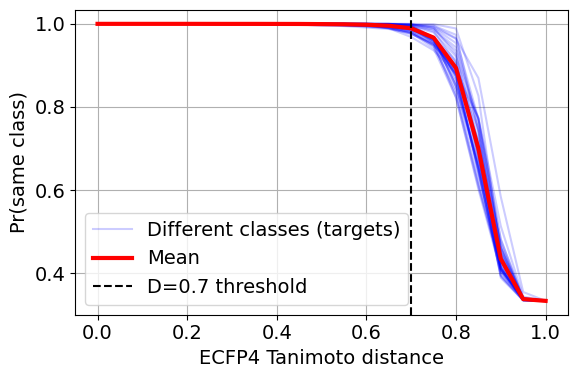

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
# set fontsize to 14
plt.rcParams.update({"font.size": 14})

label = "Different classes (targets)"
for ys in ys_array:
    plt.plot(1 - xs, ys, "-", alpha=0.2, color="b", label=label)
    label = None

plt.plot(1 - xs, y_mean, "-", color="r", label="Mean", linewidth=3)
plt.axvline(0.7, label="D=0.7 threshold", color="k", linestyle="--")
plt.xlabel("ECFP4 Tanimoto distance")
plt.ylabel("Pr(same class)")
# plt.title('MFP2'
plt.legend()
plt.grid()
plt.tight_layout()

The curves all start at 0.33 since we have constructed the sets we look at to have 1/3 active, 2/3 decoys.